# 파이썬 6월 6일 강의 복습
> "7월 13일"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최석진
- categories: [Python]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 클래스 공부 9단계

### 예비학습 (변수의 범위)

예제1

`-` 관찰1:함수내의 변수 출력

In [2]:
def f():
    x=10
    print(x)

In [3]:
f()

10


`-` 관찰2:함수내의 변수가 없을 경우 출력되지 않음

In [4]:
def g():
    print(x)

In [5]:
g()

NameError: name 'x' is not defined

`-` 관찰3:동일한 이름의 변수가 global에 있다면 함수내에 (local에) 그 이름의 변수가 선언되지 않아도 global의 변수를 빌려서 사용함

In [6]:
x=20
def g():
    print(x)

In [7]:
g()

20


`-` 관찰4:f()가 실행되면서 `x=10`이 함수내에(=local) 실행되지만 이 결과가 외부의 x=20에 (=global) 영향을 미치지는 못함

In [8]:
f()

10


In [9]:
x

20

예제2

(코드1)

In [11]:
x=26
def nextyear():
    y=x+1
    print(x,y)
nextyear()

26 27


(코드2)

In [12]:
x=26
def nextyear():
    y=x+1
    print(x,y)
    x=0
nextyear()

UnboundLocalError: local variable 'x' referenced before assignment

`-` 해석:
- 잘못된 해석: 코드1은 실행되었고, 코드2에서 에러가 남. 코드1과 2의 차이점은 `x=0`이라는 코드가 코드2에 추가로 포함되어있다는 것이다. 따라서 `x=0`이 잘못된 코드이고 이걸 실행하는 과정에서 에러가 발생

- 올바른 해석: 코드1에서 x가 global variable이고 코드2에서는 x가 local variable이어서 생기는 문제

`-` 코드2의 올바른 수정

In [14]:
x=26
def nextyear():
    x=0
    y=x+1
    print(x,y)
nextyear()

0 1


### 인스턴스 변수, 클래스 변수 
`-` 예비학습이 주는 교훈

(원칙1) global에서 정의된 이름은 local에서 정의된 이름이 없을 경우 그를 대신할 수 있다. (local은 경우에 따라서 global에 있는 변수를 빌려 쓸 수 있다)

(원칙2) local과 global에서 같은 이름 'x'가 각각 정의되어 있는 경우? global의 변수와 local의 변수는 각각 따로 행동하며 서로 영향을 주지 않는다. (독립적이다)

- 만약 local이 global의 변수를 같이 쓰고 있었다고 할지라도, 추후 새롭게 local에 같은 이름의 변수가 정의된다면 그순간 local과 global의 변수는 각자 따로 행동하며 서로에게 영향을 주지 않음

In [15]:
x=10
def f():
    print(x)

In [16]:
f()

10


In [17]:
def f():
    x=20
    print(x)

In [18]:
f()

20


`-` 이전에 공부하였던 인스턴스변수와 클래스변수 역시 비슷

In [19]:
class Moo:
    x=0

In [20]:
moo=Moo()

(관찰1)

In [21]:
Moo.x,moo.x

(0, 0)

- moo.x는 사실 정의한 적 없지만 MOO.x를 빌려쓰고 있다. (원칙1)

(관찰2)

In [22]:
Moo.x=100

In [23]:
Moo.x,moo.x

(100, 100)

- Moo.x를 변화시키면 moo.x도 변화한다(빌려쓰기 때문, 원칙1의 재확인)

(관찰3)

In [24]:
moo.x=200

In [25]:
Moo.x,moo.x

(100, 200)

- moo.x=200을 하는 순간 새롭게 인스턴스변수를 선언. 따라서 원칙2가 적용되어 이제부터 Moo.x,moo.x는 서로 독립적으로 행동.

(관찰4)

In [26]:
Moo.x=-99

In [27]:
Moo.x,moo.x

(-99, 200)

In [28]:
moo.x=99

In [29]:
Moo.x,moo.x

(-99, 99)

- Moo.x를 바꾼다고 해서 moo.x가 영향을 받지 않고 moo.x를 바꿔도 Moo.x가 영향받지 않음(완전히 독립, 원칙2의 재확인)

`-` 포인트:

(1) 클래스변수와 인스턴스 변수의 구분

(2) 인스턴스 변수가 정의되지 않으면 클래스변수를 빌려쓸 수 있음

(3) 인스턴스변수와 클래스변수가 같은 이름으로 저장되어 있으면 각각 독립적으로 행동

### 인스턴스 메소드

`-` self 비밀: 사실 클래스에서 정의된 함수의 첫번째 인자의 이름이 꼭 self일 필요는 없다(무엇으로 전달하든 클래스안에서 정의된 메소드의 첫번째 인자는 기본적으로 instance의 태명역할)

In [31]:
class Moo:
    def __init__(abab):
        abab.name='seokjin'
    def f(cdcd):
        print(cdcd.name)

In [32]:
moo=Moo()

In [33]:
moo.name

'seokjin'

In [34]:
moo.f()

seokjin


`-` 인스턴스 메소드: 위의 `__init__`와 `f`와 같이 첫번째 인자를 인스턴스의 태명으로 받는 함수를 인스턴스메소드 (간단히 메소드)라고 한다.

- 인스턴스 메소드는 `self.f()`와 같이 사용. 의미는 `f(self)`이다.

In [35]:
moo.name='sj'

In [36]:
moo.__init__() # 인스턴스메소드의 사용예시:self.__init__()의 꼴로 사용

In [37]:
moo.name

'seokjin'

In [38]:
moo.f() #인스턴스메소드의 사용예시: self.__init__()의 꼴로 사용

seokjin


`-` 아래와 같이 사용할 수 없다.

In [39]:
Moo.__init__()

TypeError: __init__() missing 1 required positional argument: 'abab'

In [40]:
moo.f()

seokjin


### 클래스 메소드

`-` 클래스 메소드: 함수의 첫인자로 클래스오브젝트를 받는 메소드를 클래스메소드라고 한다.

`-` 목표: `MOO.f()`와 같은 형태로 사용할 수 있는 함수를 만들어보자 -> 클래스메소드를 만들어보자!

In [41]:
class Moo:
    def f(self):
        print("인스턴스메소드")

In [43]:
moo=Moo()

In [44]:
moo.f()

인스턴스메소드


In [45]:
Moo.f()

TypeError: f() missing 1 required positional argument: 'self'

In [46]:
class Moo:
    @classmethod
    def f(cls): # 함수의 첫 인자로 클래스오브젝트를 받는다. cls는 클래스 Moo의 별명?이라고 생각
        print("클래스 메소드")

In [47]:
moo=Moo()

In [48]:
Moo.f()

클래스 메소드


In [49]:
moo.f() #인스턴스 메소드를 따로 정의한 적은 없지만 같은 이름의 클래스 메소드가 있으므로 빌려와서 씀!

클래스 메소드


`-` 예제

In [56]:
class Moo:
    @classmethod
    def set_class_x(cls,value): #클래스 메소드
        cls.x=value #클래스변수선언, note: Moo.x=value 와 같은 코드!
    def set_instance_x(self,value): #인스턴스 메소드
        self.x=value

In [57]:
moo=Moo()

In [60]:
Moo.set_class_x(10) #클래스메소드로 클래스변수에 10을 설정

In [61]:
Moo.set_instance_x(10) #클래스에서 인스턴스메소드를 사용 -> 사용불가

TypeError: set_instance_x() missing 1 required positional argument: 'value'

In [62]:
Moo.x,moo.x #인스턴스변수는 따로 설정하지 않았지만 클래스변수값을 빌려쓰고 있음

(10, 10)

In [63]:
moo.set_class_x(20) #인스턴스에서는 원래 set_class_x라는 메소드는 없지만 클래스에서 빌려씀

In [64]:
Moo.x,moo.x #현재 moo.x는 클래스변수를 빌려쓰고 있는 상황이므로 같이 바뀜

(20, 20)

In [65]:
moo.set_instance_x(-20) #인스턴스에서 인스턴스 메소드를 사용하여 인스턴스 변수값을 -20으로 설정
#-> 이때부터 인스턴스변수와 클래스 변수는 서로 독립적인 노선을 간다.

In [66]:
Moo.x,moo.x

(20, -20)

In [67]:
Moo.set_class_x(30) #독립적인 노선을 가기로 했으므로 클래스변수만 30으로 바뀜
Moo.x,moo.x

(30, -20)

In [68]:
moo.set_class_x(-40) #여전히 인스턴스에서 set_class_x라는 함수는 없으므로 클래스메소드를 빌려쓰고 있음
Moo.x,moo.x

(-40, -20)

### 스태틱 메소드
`-` 스태틱 메소드: 첫 인자로 인스턴스와 클래스 모두 받지 않음(클래스안에 정의되어 있지만 그냥 함수와 같음)

In [69]:
class Cals:
    @staticmethod
    def add(a,b):
        return a+b
    @staticmethod
    def sub(a,b):
        return a-b

In [70]:
fs=Cals()

In [71]:
fs.add(1,2)

3

In [72]:
fs.sub(1,2)

-1

- fs는 그냥 함수들을 묶어놓은 느낌? 정리하게 편하게?

## 클래스 10단계
### 문자열 join

`-` 예제

In [73]:
lst=list('abcd')
lst

['a', 'b', 'c', 'd']

In [74]:
''.join(lst)

'abcd'

`-` 해설:''는 string object이고 `.join`는 string object에 소속된 메소드이다.

In [75]:
a=''
a.join(lst)

'abcd'

`-` join의 간단한 사용방법

In [76]:
'-'.join(lst)

'a-b-c-d'

### matplotlib

`-` 파이썬의 모든것은 객체이다:matplotlib의 다른 사용(객체지향적 언어로 그림그리기!)

`-` 그림오브젝트 생성

In [77]:
fig=plt.figure() #그림오브젝트 생성되고 fig라는 이름이 붙음

<Figure size 432x288 with 0 Axes>

`-` 그림오브젝트의 axes를 확인 -> 아무것도 없음

In [79]:
fig.axes

[]

`-` (0,0) 자리에 (가로=1,세로=1) 크기의 axes를 넣음.

In [80]:
fig.add_axes([0,0,1,1])

<Axes:>

In [81]:
fig.axes

[<Axes:>]

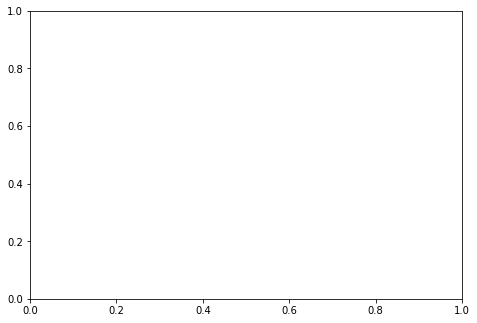

In [82]:
fig

`-` (0,1.2) 위치에 (가로=1,세로=1) 크기의 axes 추가

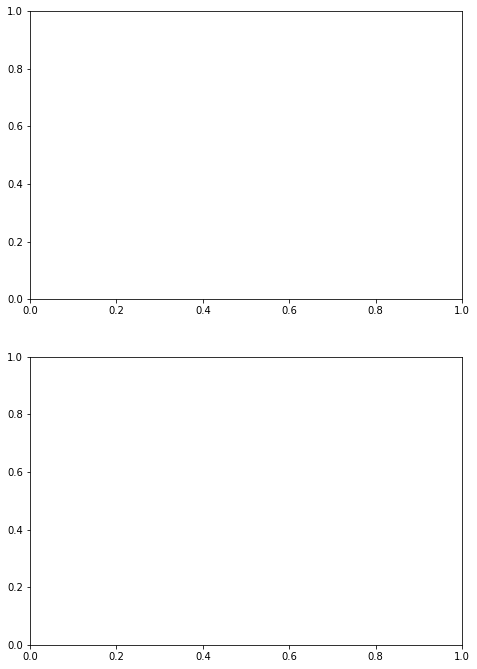

In [83]:
fig.add_axes([0,1.2,1,1])
fig

`-` (0.5,0.5)위치에 (가로=1,세로=1) 크기의 그림 추가

In [84]:
fig.add_axes([0.5,0.5,1,1])

<Axes:>

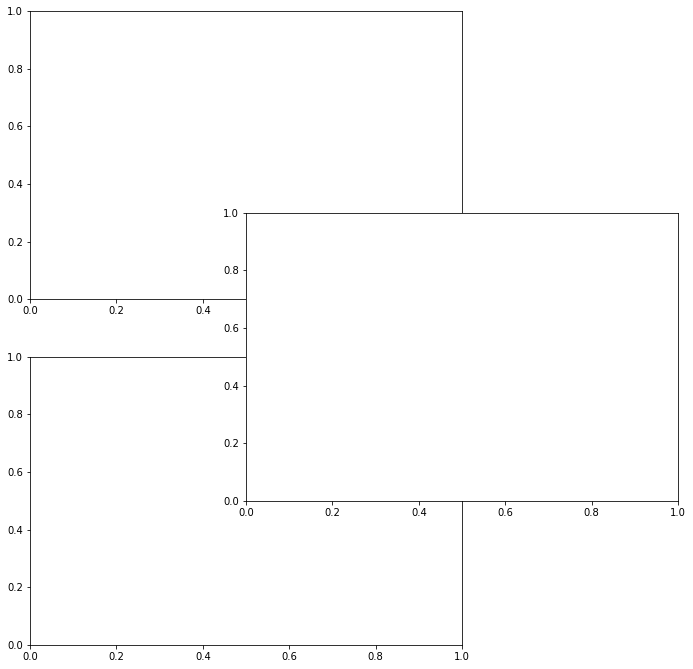

In [85]:
fig

`-` fig의 세번째 axes에 접근

In [86]:
a3=fig.axes[2]
a3

<Axes:>

`-` axes의 메소드중 plot이 존재 -> 그림을 그려봄

In [88]:
a3.plot([1,2,3],[4,5,3],'--r')

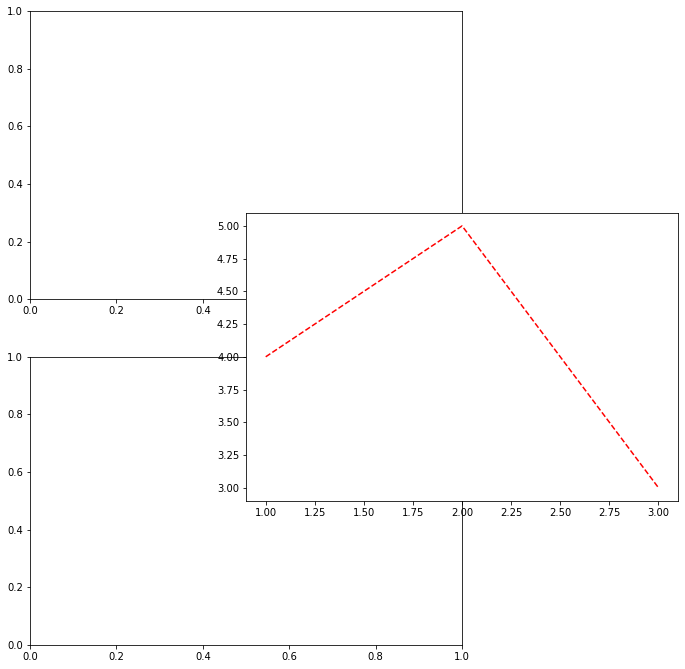

In [89]:
fig

`-` 다시 세번째 축에 접근해 다른그림을 그림

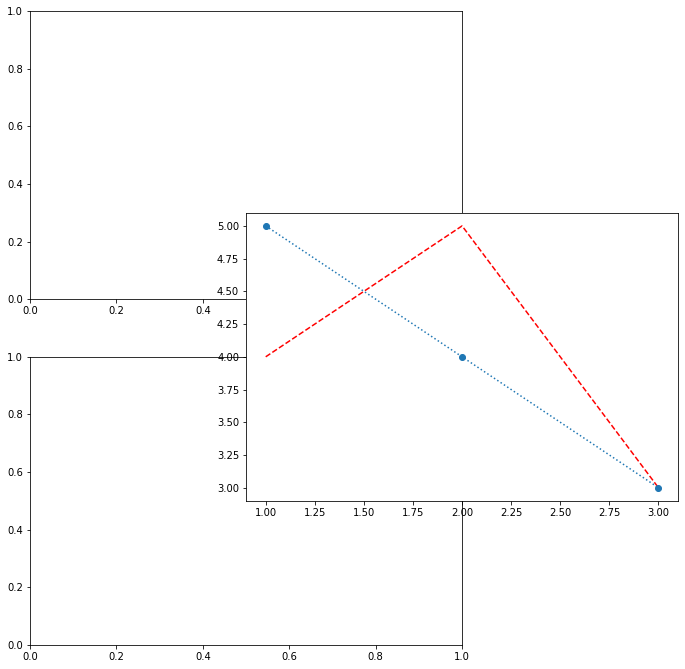

In [92]:
fig.axes[-1].plot([1,2,3],[5,4,3],':o')
fig

`-` 첫번째 축에 접근해 새로운 그림을 그림.

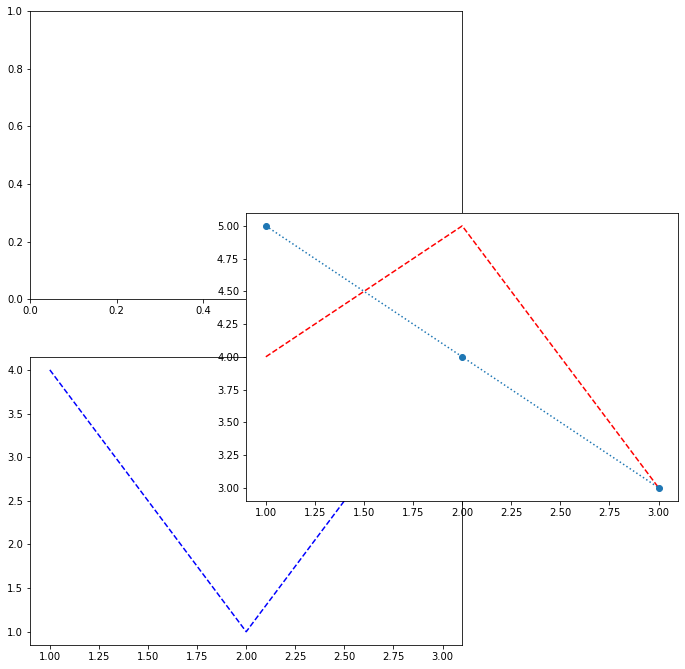

In [93]:
fig.axes[0].plot([1,2,3],[4,1,4],'--b')
fig

`-` 클래스에 대한 이해가 없다면 위와 같은 그림을 그리기도 힘들고 코드를 해석하기도 힘듬

### 참조와 에일리어싱

`-` 아래의 코드를 관찰

In [94]:
a=[1,2,3]
b=a
a=a+[4]

현재 a,b의 출력결과는?

In [95]:
a,b

([1, 2, 3, 4], [1, 2, 3])

`-` 아래의 코드를 다시 관찰

In [96]:
a=[1,2,3]
b=a
a.append(4)

현재 a,b의 출력결과는?

In [97]:
a,b

([1, 2, 3, 4], [1, 2, 3, 4])

`-` 아래의 코드 다시 살펴봄
```python
a=[1,2,3]
b=a
a.append(4)
```

a,b라는 변수들은 메모리에 어떻게 저장이 되어 있을까?

상상력을 조금 발휘하면 아래와 같이 여길 수 있다.

(1) 메모리는 변수를 담을 방이 여러개 있는 호텔이라고 생각

(2) 아래를 실행하였을 경우
```python
a=[1,2,3]
```
- 메모리주소1에 존재하는 방을 a라고 하고, 그 방에 [1,2,3]을 넣는다.

(3) 아래를 실행하였을 경우
```python
b=a
```
- 메모리주소38에 존재하는 방을 b라고 하고, 그 방에 a를 넣어야하는데, a는 [1,2,3]이니까 [1,2,3]을 넣는다.

(4) 아래를 실행하면
```python
a.append(4)
```
- 방 a로 가서 [1,2,3]을 [1,2,3,4]로 바꾼다.
- 그리고 방 b에는 아무것도 하지 않는다.


`-` R에서는 맞는 비유인데, 파이썬은 적절하지 않는 비유이다.

In [98]:
id(a)

140480241978176

In [99]:
id(b)

140480241978176

실제로는 a,b가 저장된 메모리 주소가 동일함

`-` 파이썬에서는 아래가 더 적절한 비유이다.

(1) 메모리는 변수를 담을 방이 여러개 있는 호텔이라고 생각하자.

(2) 아래를 실행하였을 경우
```python
a=[1,2,3]
```
- 메모리주소140480241978176에서 [1,2,3]을 생성
- 방 140480241978176의 방문에 a라는 포스트잇을 붙임
- 앞으로 [1,2,3]에 접근하기 위해서는 여러 메모리방중에서 a라는 포스트잇이 붙은 방을 찾아가면 됨

(3) 아래를 실행하였을 경우
```python
b=a
```

- a라는 포스트잇이 있는데, a라는 포스트잇이랑 b라는 포스트잇과 같은 효과를 주도록 함
- 쉽게말하면 b라는 포스트잇을 방 140480241978176의 방문에 붙인다는 이야기
- 앞으로 [1,2,3]에 접근하기 위해서는 여러 메모리방중에서 a라는 포스트잇이 붙어있거나 b라는 포스트잇이 붙어있는 방을 찾아가면 됨

(4) 아래를 실행하면
```python
a.append(4)
```
- a라는 포스트잇이 붙어있는 방으로 가서, 그 내용물 append함수를 써서 4를 추가하라. 즉 내용물 [1,2,3]을 [1,2,3,4]로 바꿈
- 같은방에 a,b라는 포스트잇이 모두 붙어있음. 따라서 b라는 포스트잇이 붙은 방을 찾아가서 내용물을 열어보면 [1,2,3,4]가 나옴

`-` 결론: 파이썬의 모든것은 오브젝트이다. 그리고 모든 오브젝트는 메모리주소위에 올라간다. 하지만 그 메모리주소에 붙어있는 포스트잇이 하나라는 보장은 없다.